In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [388]:
df = pd.read_csv("./filtered_delhivery_data.csv")
df.head()

,trip_creation_time,route_type,source_center,destination_center,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   trip_creation_time              144867 non-null  object 
 1   route_type                      144867 non-null  object 
 2   source_center                   144867 non-null  object 
 3   destination_center              144867 non-null  object 
 4   actual_distance_to_destination  144867 non-null  float64
 5   actual_time                     144867 non-null  float64
 6   osrm_time                       144867 non-null  float64
 7   osrm_distance                   144867 non-null  float64
 8   segment_actual_time             144867 non-null  float64
 9   segment_osrm_time               144867 non-null  float64
 10  segment_osrm_distance           144867 non-null  float64
dtypes: float64(7), object(4)
memory usage: 12.2+ MB


In [390]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['route_type'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144867 non-null  datetime64[ns]
 1   route_type                      144867 non-null  object        
 2   source_center                   144867 non-null  object        
 3   destination_center              144867 non-null  object        
 4   actual_distance_to_destination  144867 non-null  float64       
 5   actual_time                     144867 non-null  float64       
 6   osrm_time                       144867 non-null  float64       
 7   osrm_distance                   144867 non-null  float64       
 8   segment_actual_time             144867 non-null  float64       
 9   segment_osrm_time               144867 non-null  float64       
 10  segment_osrm_distance           144867 non-null  float64

In [148]:
Source_dict = dict(df['source_center'].value_counts())
Des_dict = dict(df['destination_center'].value_counts())

merged_dict = {}
for key, value in Source_dict.items():
    merged_dict[key] = [value]

for key, value in Des_dict.items():
    if key in merged_dict:
        merged_dict[key].append(value)
    else:
        merged_dict[key] = [0, value]

print(merged_dict)

# convert dict into list
Source_and_des = pd.DataFrame.from_dict(merged_dict, orient='index').reset_index()
Source_and_des.columns = ['CenterID', 'NumAsSource', 'NumAsDes']
Source_and_des

{'IND000000ACB': [23347, 15192], 'IND562132AAA': [9975, 11019], 'IND421302AAG': [9088, 5492], 'IND411033AAA': [4061, 3695], 'IND501359AAE': [3340, 5142], 'IND712311AAA': [2612, 4892], 'IND160002AAC': [2450, 2874], 'IND395023AAA': [2189, 988], 'IND110037AAM': [2013, 3769], 'IND560099AAB': [1958, 1425], 'IND382430AAB': [1760, 1953], 'IND131028AAB': [1682, 2796], 'IND600056AAB': [1678, 2096], 'IND781018AAB': [1568, 674], 'IND209304AAA': [1513, 2246], 'IND751002AAB': [1469, 2524], 'IND462022AAA': [1450, 2264], 'IND560300AAA': [1331, 1232], 'IND834002AAB': [1074, 1307], 'IND854326AAB': [1053, 394], 'IND302014AAA': [791, 1700], 'IND110044AAB': [766, 106], 'IND530012AAA': [711, 680], 'IND842001AAA': [709, 1271], 'IND400072AAB': [709, 596], 'IND000000ACT': [699], 'IND306401AAB': [622, 247], 'IND121004AAB': [615, 556], 'IND825409AAA': [614, 42], 'IND821115AAB': [541, 808], 'IND413002AAA': [507, 622], 'IND416012AAA': [482, 489], 'IND000000ACA': [464, 474], 'IND444005AAB': [444, 513], 'IND518002A

,CenterID,NumAsSource,NumAsDes
0,IND000000ACB,23347,15192.0
1,IND562132AAA,9975,11019.0
2,IND421302AAG,9088,5492.0
3,IND411033AAA,4061,3695.0
4,IND501359AAE,3340,5142.0
...,...,...,...
1652,IND761020AAA,0,1.0
1653,IND000000AFS,0,1.0
1654,IND148024AAB,0,1.0
1655,IND741502AAB,0,1.0


In [149]:
Source_and_des.head()

,CenterID,NumAsSource,NumAsDes
0,IND000000ACB,23347,15192.0
1,IND562132AAA,9975,11019.0
2,IND421302AAG,9088,5492.0
3,IND411033AAA,4061,3695.0
4,IND501359AAE,3340,5142.0


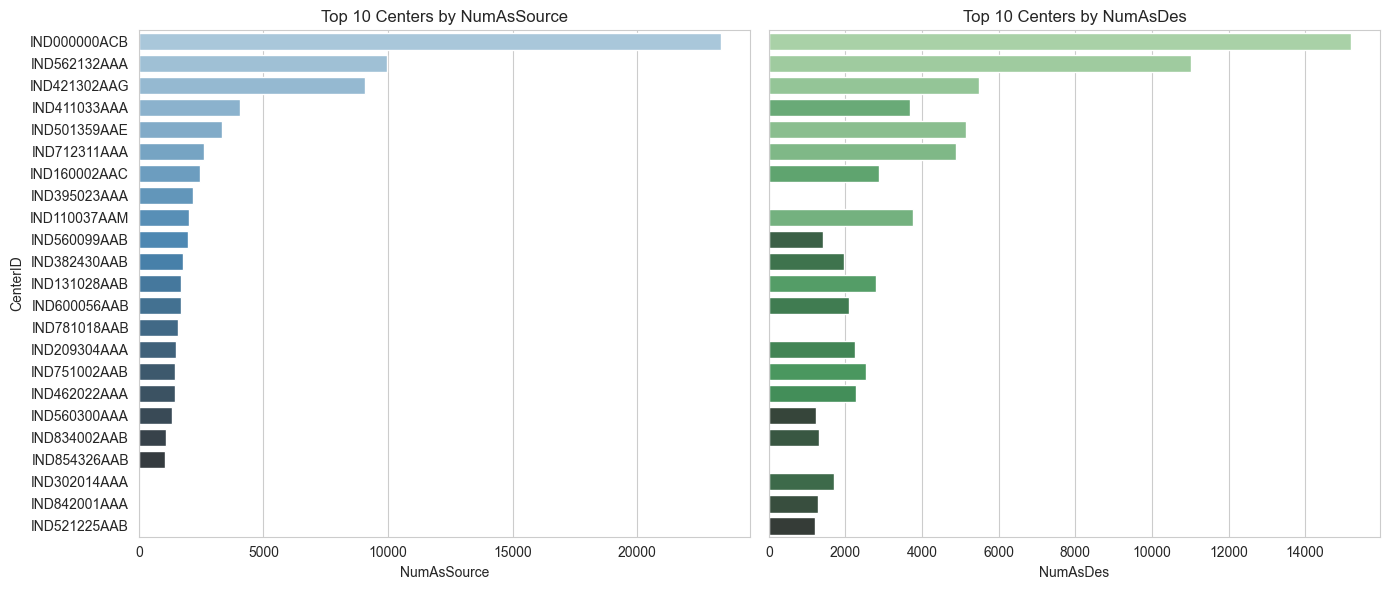

In [157]:
top_source = Source_and_des.nlargest(20, "NumAsSource")
top_des = Source_and_des.nlargest(20, "NumAsDes")

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(ax=axes[0], y="CenterID", x="NumAsSource", hue = "CenterID", data=top_source, palette="Blues_d", legend=False)
axes[0].set_title("Top 10 Centers by NumAsSource")
axes[0].set_xlabel("NumAsSource")
axes[0].set_ylabel("CenterID")

sns.barplot(ax=axes[1], y="CenterID", x="NumAsDes", hue = "CenterID", data=top_des, palette="Greens_d", legend=False)
axes[1].set_title("Top 10 Centers by NumAsDes")
axes[1].set_xlabel("NumAsDes")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

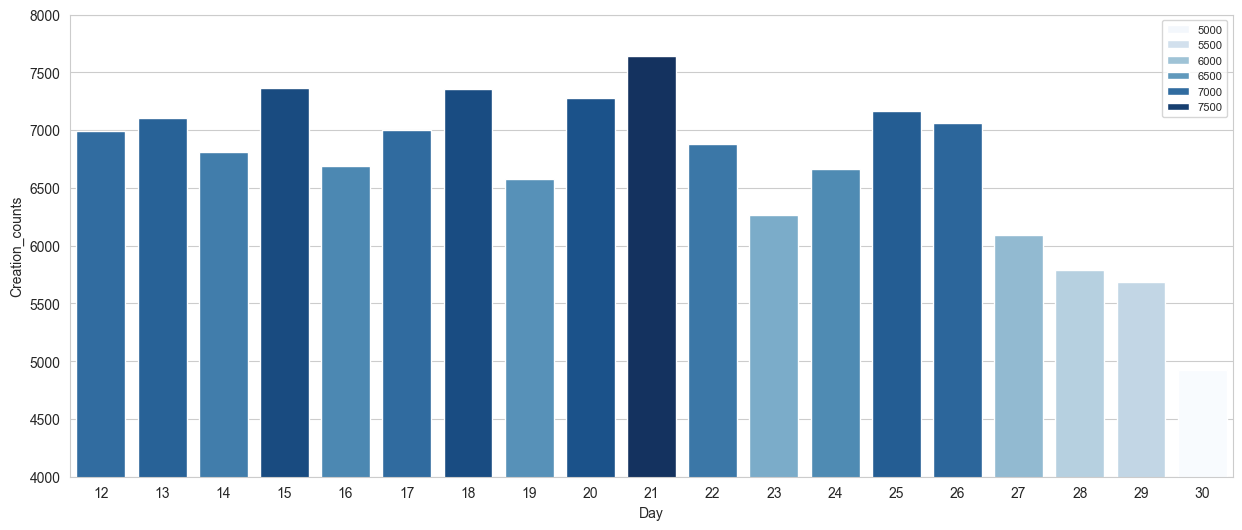

'\nfig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)\nsns.barplot(ax=axes[0], y=\'Day\', x=\'Creation_counts\', hue = \'Creation_counts\', data=Sep_day_df, palette="Blues_d")\naxes[0].set_title("Top 10 Centers by NumAsSource")\naxes[0].set_xlabel("NumAsSource")\naxes[0].set_ylabel("CenterID")\n\nsns.barplot(ax=axes[1], y=\'Day\', x=\'Creation_counts\', hue = \'Creation_counts\', data=Oct_day_df, palette="Greens_d")\naxes[1].set_title("Top 10 Centers by NumAsSource")\naxes[1].set_xlabel("NumAsSource")\naxes[1].set_ylabel("CenterID")\n\nplt.legend(loc=\'upper right\', fontsize=8)\nplt.xticks(fontsize=10)\nplt.yticks(fontsize=10)\nplt.show()\n'

In [219]:
# the imbalanced distribution between Sep and Oct
# As a result, process seperately
df['trip_creation_time'].dt.month.value_counts()
Create_in_Sep = df['trip_creation_time'][df['trip_creation_time'].dt.month == 9]
Create_in_Oct = df['trip_creation_time'][df['trip_creation_time'].dt.month == 10]
Sep_day_counts = Create_in_Sep.dt.day.value_counts().sort_index()
Oct_day_counts = Create_in_Oct.dt.day.value_counts().sort_index()

# not enough samples in October
Oct_day_counts
# using Sep only

Sep_day_df = Sep_day_counts.reset_index()
Sep_day_df.columns = ['Day', 'Creation_counts'] 

Oct_day_df = Oct_day_counts.reset_index()
Oct_day_df.columns = ['Day', 'Creation_counts']

plt.figure(figsize=(15, 6))
plt.ylim(4000, 8000)
sns.barplot(x='Day', y='Creation_counts', hue = 'Creation_counts', data=Sep_day_df, palette='Blues')
plt.legend(loc='upper right', fontsize=8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

"""
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.barplot(ax=axes[0], y='Day', x='Creation_counts', hue = 'Creation_counts', data=Sep_day_df, palette="Blues_d")
axes[0].set_title("Top 10 Centers by NumAsSource")
axes[0].set_xlabel("NumAsSource")
axes[0].set_ylabel("CenterID")

sns.barplot(ax=axes[1], y='Day', x='Creation_counts', hue = 'Creation_counts', data=Oct_day_df, palette="Greens_d")
axes[1].set_title("Top 10 Centers by NumAsSource")
axes[1].set_xlabel("NumAsSource")
axes[1].set_ylabel("CenterID")

plt.legend(loc='upper right', fontsize=8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
"""

In [137]:
S_D_Network = df[['source_center','destination_center']]

#S_D_Network = S_D_Network.set_index('source_center')

#S_D_Network  = pd.concat([S_D_Network, Source_and_des],axis=1)
Source_NumCounts = []
for source_ in S_D_Network['source_center'].tolist():
    Source_NumCounts.append(merged_dict.get(source_)[0])

Des_NumCounts = []
for Des_ in S_D_Network['destination_center'].tolist():
    Des_NumCounts.append(merged_dict.get(source_)[1])
    
S_D_Network['Source_counts'] = Source_NumCounts
S_D_Network['Des_counts'] = Des_NumCounts

S_D_Network['S_D_Sum'] = S_D_Network['Source_counts'] + S_D_Network['Des_counts']



S_D_Network = S_D_Network.sort_values(by='S_D_Sum', ascending=False)
#len(Source_NumCounts), len(Des_NumCounts)
Sliced_SD = S_D_Network.head(5000)
len(Sliced_SD)

/var/folders/8t/3xrvdszj1g75llc2jb40dnvw0000gn/T/ipykernel_11122/3778654240.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8t/3xrvdszj1g75llc2jb40dnvw0000gn/T/ipykernel_11122/3778654240.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8t/3xrvdszj1g75llc2jb40dnvw0000gn/T/ipykernel_11122/3778654240.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

5000

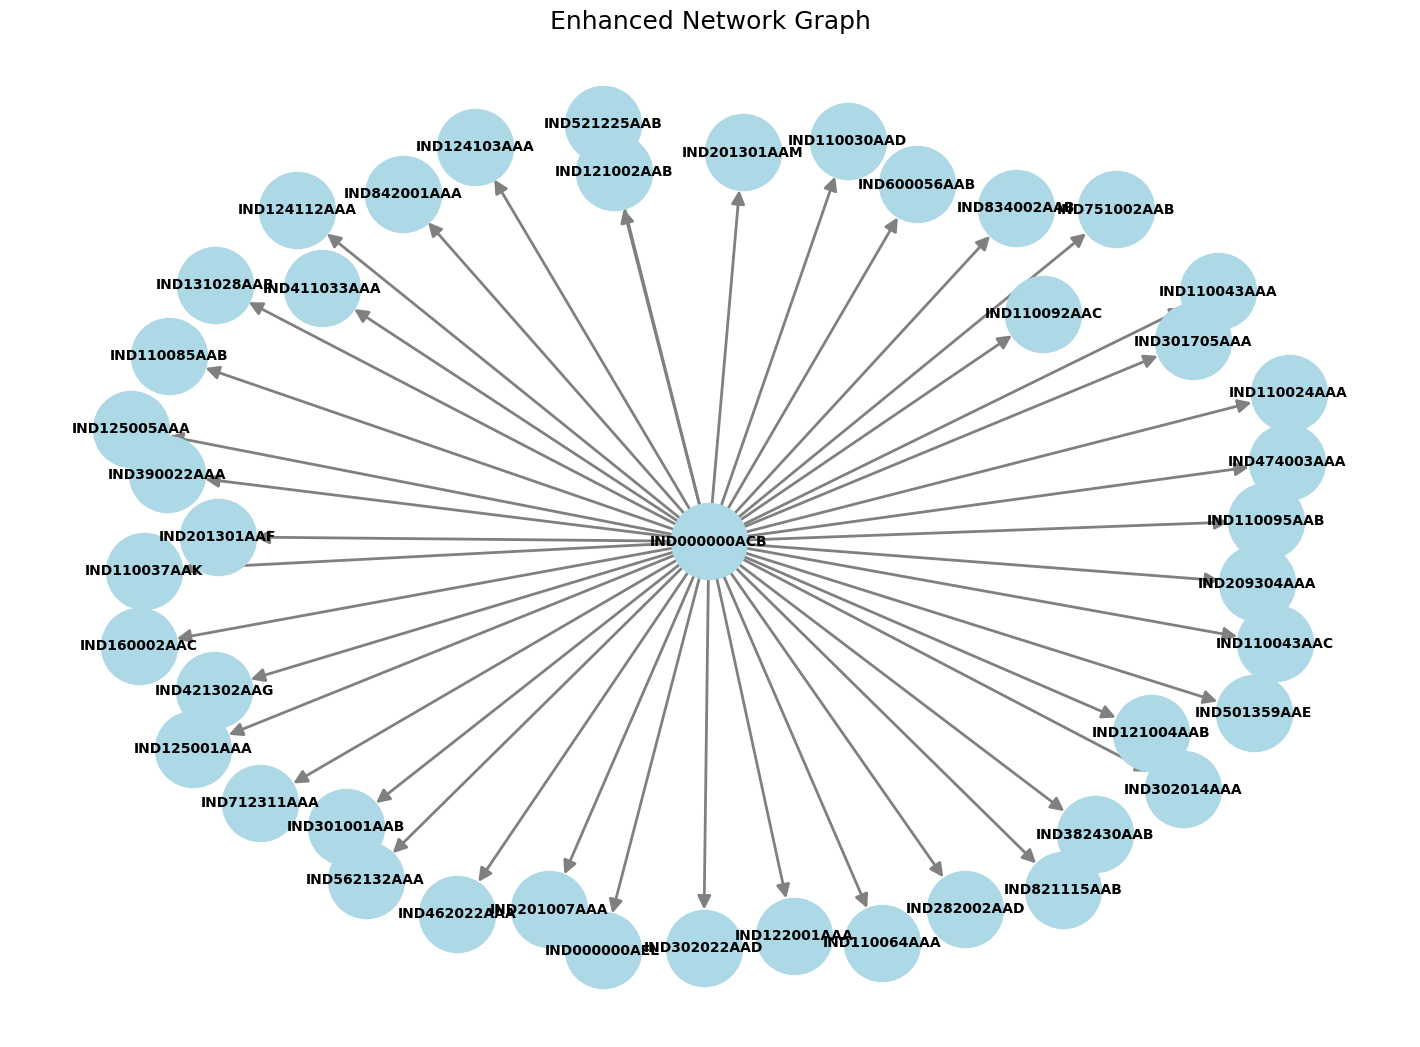

In [138]:
import networkx as nx
import matplotlib.pyplot as plt
# 创建有向图

G = nx.DiGraph()

edges = list(zip(Sliced_SD['source_center'], Sliced_SD['destination_center']))
G.add_edges_from(edges)

# 布局调整：选择 spring_layout，并设定参数
pos = nx.spring_layout(G, k=0.8, iterations=50, seed=42)  # k 调整节点间距离
#pos = nx.circular_layout(G)
# pos = nx.kamada_kawai_layout(G)
# 绘图参数
plt.figure(figsize=(14, 10))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=3000,
    node_color='lightblue',
    font_size=10,
    font_weight='bold',
    edge_color='gray',
    arrowsize=20,  # 箭头大小
    width=2        # 边宽
)

# 添加标题
plt.title("Enhanced Network Graph", fontsize=18)
plt.show()

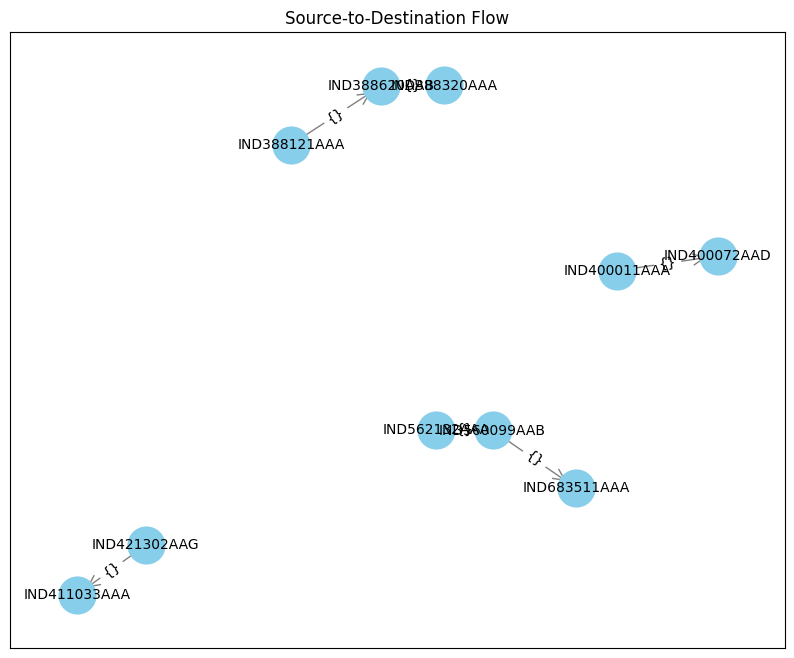

In [81]:
import networkx as nx
import matplotlib.pyplot as plt

S_D_Network = df[['source_center','destination_center']].head(30)

G = nx.DiGraph()
#centers = S_D_Network["source_center"].tolist()
G.add_nodes_from(Centers)
for _, row in S_D_Network.iterrows():
    G.add_edge(row['source_center'], row['destination_center'])
    # , weight=row["NumAsSource"]
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

#edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos)

plt.title("Source-to-Destination Flow")
plt.show()

In [ ]:
"""
• data - tells whether the data is testing or training data
• trip_creation_time – Timestamp of trip creation
• route_schedule_uuid – Unique Id for a particular route schedule
• route_type – Transportation type
• FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
• Carting: Handling system consisting of small vehicles (carts)
• trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
• source_center - Source ID of trip origin
• source_name - Source Name of trip origin
• destination_cente – Destination ID
• destination_name – Destination Name
• od_start_time – Trip start time
• od_end_time – Trip end time
• start_scan_to_end_scan – Time taken to deliver from source to destination
• is_cutoff – Unknown field
• cutoff_factor – Unknown field
• cutoff_timestamp – Unknown field
• actual_distance_to_destination – Distance in Kms between source and destination warehouse
• actual_time – Actual time taken to complete the delivery (Cumulative)
• osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
• osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
• factor – Unknown field
• segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
• segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
• segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
• segment_factor – Unknown field
"""

In [222]:
df.columns


Index(['trip_creation_time', 'route_type', 'source_center',
       'destination_center', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [391]:

X = df[['actual_distance_to_destination']]
y = df['actual_time']

X

,actual_distance_to_destination
0,10.435660
1,18.936842
2,27.637279
3,36.118028
4,39.386040
...,...
144862,45.258278
144863,54.092531
144864,66.163591
144865,73.680667


In [392]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [394]:

def linear_regression_evaluation(X_raw, y_raw):
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Coefficients (斜率):", model.coef_)
    print("Intercept (截距):", model.intercept_)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
"""
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\nplt.scatter(X_test, y_test, color='blue', label='Actual')\nplt.plot(X_test, y_pred, color='red', label='Predicted')\nplt.xlabel('X')\nplt.ylabel('y')\nplt.legend()\nplt.show()\n"

In [ ]:
import itertools

actual_slice = df[['actual_distance_to_destination', 'actual_time']]
osrm_slice = df[['osrm_distance', 'osrm_time']]
segment_slice = df[['segment_osrm_distance', 'segment_osrm_time', 'segment_actual_time']]

print(f"The comparsion between orsm time and actual time within segment:\n{(segment_slice['segment_osrm_time'] == segment_slice['segment_actual_time']).value_counts()}\n")
print(f"The comparsion of distance between actual and osrm:\n{(actual_slice['actual_distance_to_destination'] == osrm_slice['osrm_distance']).value_counts()}\n")
print(f"The comparsion of time between actual and osrm:\n{(actual_slice['actual_time'] == osrm_slice['osrm_time']).value_counts()}\n")
# diverge can be observed from the value_counts
# therefore, the new columns present delta can be created


In [396]:
# using the loop of to create deltas within distance and time in different categories
distance_columns = ['actual_distance_to_destination', 'osrm_distance', 'segment_osrm_distance']
time_columns =['actual_time', 'osrm_time', 'segment_osrm_time', 'segment_actual_time']
df_delta = df.copy()

# create columns record the delta within distance
for col1, col2 in itertools.combinations(distance_columns, 2):
    df_delta[f'{col1}_minus_{col2}'] = df_delta[col1] - df_delta[col2]

# create columns record the delta within time
for col1, col2 in itertools.combinations(time_columns, 2):
    df_delta[f'{col1}_minus_{col2}'] = df_delta[col1] - df_delta[col2]

df_delta.columns
df_delta.iloc[:, -9:].describe()
# as we can see the the deviaion is huge within these datapoints
# this phenomenon may result from the technical failures, and outliers should be removed

,actual_distance_to_destination_minus_osrm_distance,actual_distance_to_destination_minus_segment_osrm_distance,osrm_distance_minus_segment_osrm_distance,actual_time_minus_osrm_time,actual_time_minus_segment_osrm_time,actual_time_minus_segment_actual_time,osrm_time_minus_segment_osrm_time,osrm_time_minus_segment_actual_time,segment_osrm_time_minus_segment_actual_time
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,-50.697925,211.244352,261.942277,203.059254,398.419978,380.731416,195.360724,177.672161,-17.688563
std,81.388901,341.286673,417.199154,303.743664,595.747939,593.822579,305.740818,309.990667,49.010556
min,-469.458566,-469.358156,-136.985500,-110.000000,-107.000000,0.000000,-97.000000,-2418.000000,-2418.000000
25%,-54.992652,8.892952,13.789200,21.000000,38.000000,27.000000,14.000000,2.000000,-19.000000
50%,-14.802877,42.588930,55.768700,65.000000,114.000000,95.000000,47.000000,36.000000,-10.000000
75%,-4.790011,260.129576,314.624650,247.000000,491.000000,464.500000,236.000000,221.000000,-5.000000
max,0.230174,1920.757605,2319.509000,3137.000000,4532.000000,4532.000000,1682.000000,1658.000000,274.000000


In [397]:
delta_columns = df_delta.columns.tolist()[-9:]
#  the boxplot demonstrates better performance than normalization
for i in delta_columns:
    Q1 = df_delta[i].quantile(0.25)
    Q3 = df_delta[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_delta[i] < (Q1 - 1.5 * IQR)) | (df_delta[i] > (Q3 + 1.5 * IQR)))
    df_delta[f'{i}_outlier'] = outliers
df_delta.columns
df_delta['segment_osrm_time_minus_segment_actual_time_outlier'].value_counts()
last_9_columns = df_delta.iloc[:, -9:]
df_without_outliers = df_delta[~last_9_columns.all(axis=1)]

In [398]:
df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143521 entries, 0 to 144866
Data columns (total 29 columns):
 #   Column                                                              Non-Null Count   Dtype         
---  ------                                                              --------------   -----         
 0   trip_creation_time                                                  143521 non-null  datetime64[ns]
 1   route_type                                                          143521 non-null  object        
 2   source_center                                                       143521 non-null  object        
 3   destination_center                                                  143521 non-null  object        
 4   actual_distance_to_destination                                      143521 non-null  float64       
 5   actual_time                                                         143521 non-null  float64       
 6   osrm_time                                        

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144867 non-null  datetime64[ns]
 1   route_type                      144867 non-null  object        
 2   source_center                   144867 non-null  object        
 3   destination_center              144867 non-null  object        
 4   actual_distance_to_destination  144867 non-null  float64       
 5   actual_time                     144867 non-null  float64       
 6   osrm_time                       144867 non-null  float64       
 7   osrm_distance                   144867 non-null  float64       
 8   segment_actual_time             144867 non-null  float64       
 9   segment_osrm_time               144867 non-null  float64       
 10  segment_osrm_distance           144867 non-null  float64

In [243]:
# example of a super learner model for regression
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


X = df[['actual_distance_to_destination']].to_numpy()
y = df['actual_time'].to_numpy()

# create a list of base-models
def get_models():
	models = list()
	models.append(LinearRegression())
	models.append(ElasticNet())
	models.append(SVR(gamma='scale'))
	models.append(DecisionTreeRegressor())
	models.append(KNeighborsRegressor())
	models.append(AdaBoostRegressor())
	models.append(BaggingRegressor(n_estimators=10))
	models.append(RandomForestRegressor(n_estimators=10))
	models.append(ExtraTreesRegressor(n_estimators=10))
	return models

# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y = list(), list()
	# define split of data
	kfold = KFold(n_splits=10, shuffle=True)
	# enumerate splits
	for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		# get data
		train_X, test_X = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]
		meta_y.extend(test_y)
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y)
			yhat = model.predict(test_X)
			# store columns
			fold_yhats.append(yhat.reshape(len(yhat),1))
		# store fold yhats as columns
		meta_X.append(hstack(fold_yhats))
	return vstack(meta_X), asarray(meta_y)

# fit all base models on the training dataset
def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y)

# fit a meta model
def fit_meta_model(X, y):
	model = LinearRegression()
	model.fit(X, y)
	return model

# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
	for model in models:
		yhat = model.predict(X)
		mse = mean_squared_error(y, yhat)
		print('%s: RMSE %.3f' % (model.__class__.__name__, sqrt(mse)))

# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for model in models:
		yhat = model.predict(X)
		meta_X.append(yhat.reshape(len(yhat),1))
	meta_X = hstack(meta_X)
	# predict
	return meta_model.predict(meta_X)


# split the training and testing dataset
X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)
print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)
# get models
models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X, y, models)
print('Meta ', meta_X.shape, meta_y.shape)
# fit base models
fit_base_models(X, y, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_val, y_val, models)
# evaluate meta model
yhat = super_learner_predictions(X_val, models, meta_model)
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_val, yhat))))

Train (72433, 1) (72433,) Test (72434, 1) (72434,)
Meta  (72433, 9) (72433,)
LinearRegression: RMSE 122.316
ElasticNet: RMSE 122.316
SVR: RMSE 136.331
DecisionTreeRegressor: RMSE 169.082
KNeighborsRegressor: RMSE 131.362
AdaBoostRegressor: RMSE 176.342
BaggingRegressor: RMSE 147.501
RandomForestRegressor: RMSE 147.514
ExtraTreesRegressor: RMSE 155.330
Super Learner: RMSE 121.828


In [246]:
df.head()


,trip_creation_time,route_type,source_center,destination_center,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


The comparsion orsm time and actual time within segment:
False    140779
True       4088
Name: count, dtype: int64

The comparsion distance between actual and osrm:
False    144867
Name: count, dtype: int64

False    144867
Name: count, dtype: int64
False    144315
True        552
Name: count, dtype: int64


,actual_distance_to_destination_minus_osrm_distance,actual_distance_to_destination_minus_segment_osrm_distance,osrm_distance_minus_segment_osrm_distance,actual_time_minus_osrm_time,actual_time_minus_segment_osrm_time,actual_time_minus_segment_actual_time,osrm_time_minus_segment_osrm_time,osrm_time_minus_segment_actual_time,segment_osrm_time_minus_segment_actual_time
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,-50.697925,211.244352,261.942277,203.059254,398.419978,380.731416,195.360724,177.672161,-17.688563
std,81.388901,341.286673,417.199154,303.743664,595.747939,593.822579,305.740818,309.990667,49.010556
min,-469.458566,-469.358156,-136.985500,-110.000000,-107.000000,0.000000,-97.000000,-2418.000000,-2418.000000
25%,-54.992652,8.892952,13.789200,21.000000,38.000000,27.000000,14.000000,2.000000,-19.000000
50%,-14.802877,42.588930,55.768700,65.000000,114.000000,95.000000,47.000000,36.000000,-10.000000
75%,-4.790011,260.129576,314.624650,247.000000,491.000000,464.500000,236.000000,221.000000,-5.000000
max,0.230174,1920.757605,2319.509000,3137.000000,4532.000000,4532.000000,1682.000000,1658.000000,274.000000


['actual_distance_to_destination_minus_osrm_distance',
 'actual_distance_to_destination_minus_segment_osrm_distance',
 'osrm_distance_minus_segment_osrm_distance',
 'actual_time_minus_osrm_time',
 'actual_time_minus_segment_osrm_time',
 'actual_time_minus_segment_actual_time',
 'osrm_time_minus_segment_osrm_time',
 'osrm_time_minus_segment_actual_time',
 'segment_osrm_time_minus_segment_actual_time']

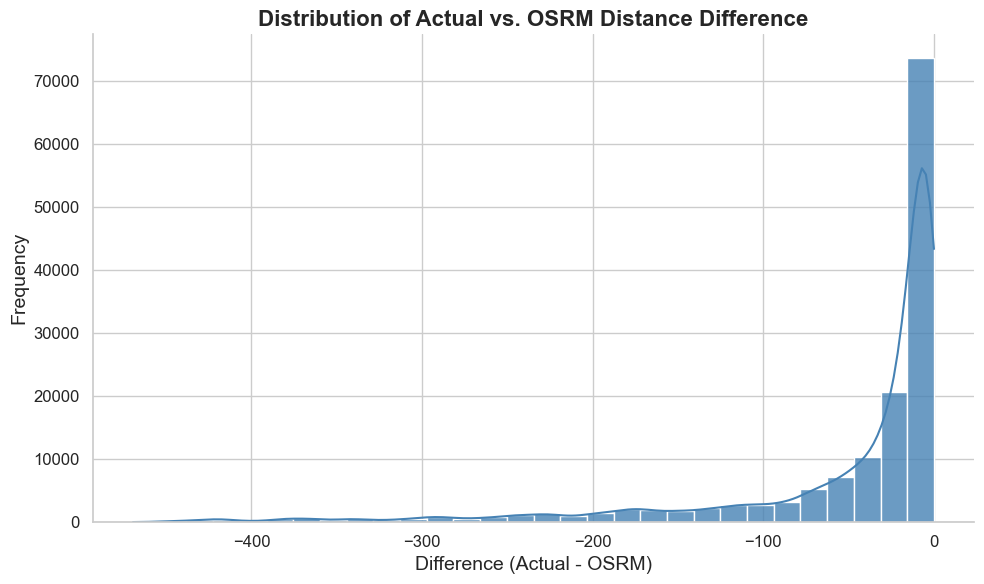

In [ ]:
# Initially, distribution of deltas can be observed.
sns.set_theme(style="whitegrid", palette="muted")


plt.figure(figsize=(10, 6))
sns.histplot(
    df_delta['actual_distance_to_destination_minus_osrm_distance'], 
    kde=True, 
    bins=30, 
    color='steelblue',
    edgecolor='white',
    alpha=0.8
)

plt.title('Distribution of Actual vs. OSRM Distance Difference', fontsize=16, fontweight='bold')
plt.xlabel('Difference (Actual - OSRM)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

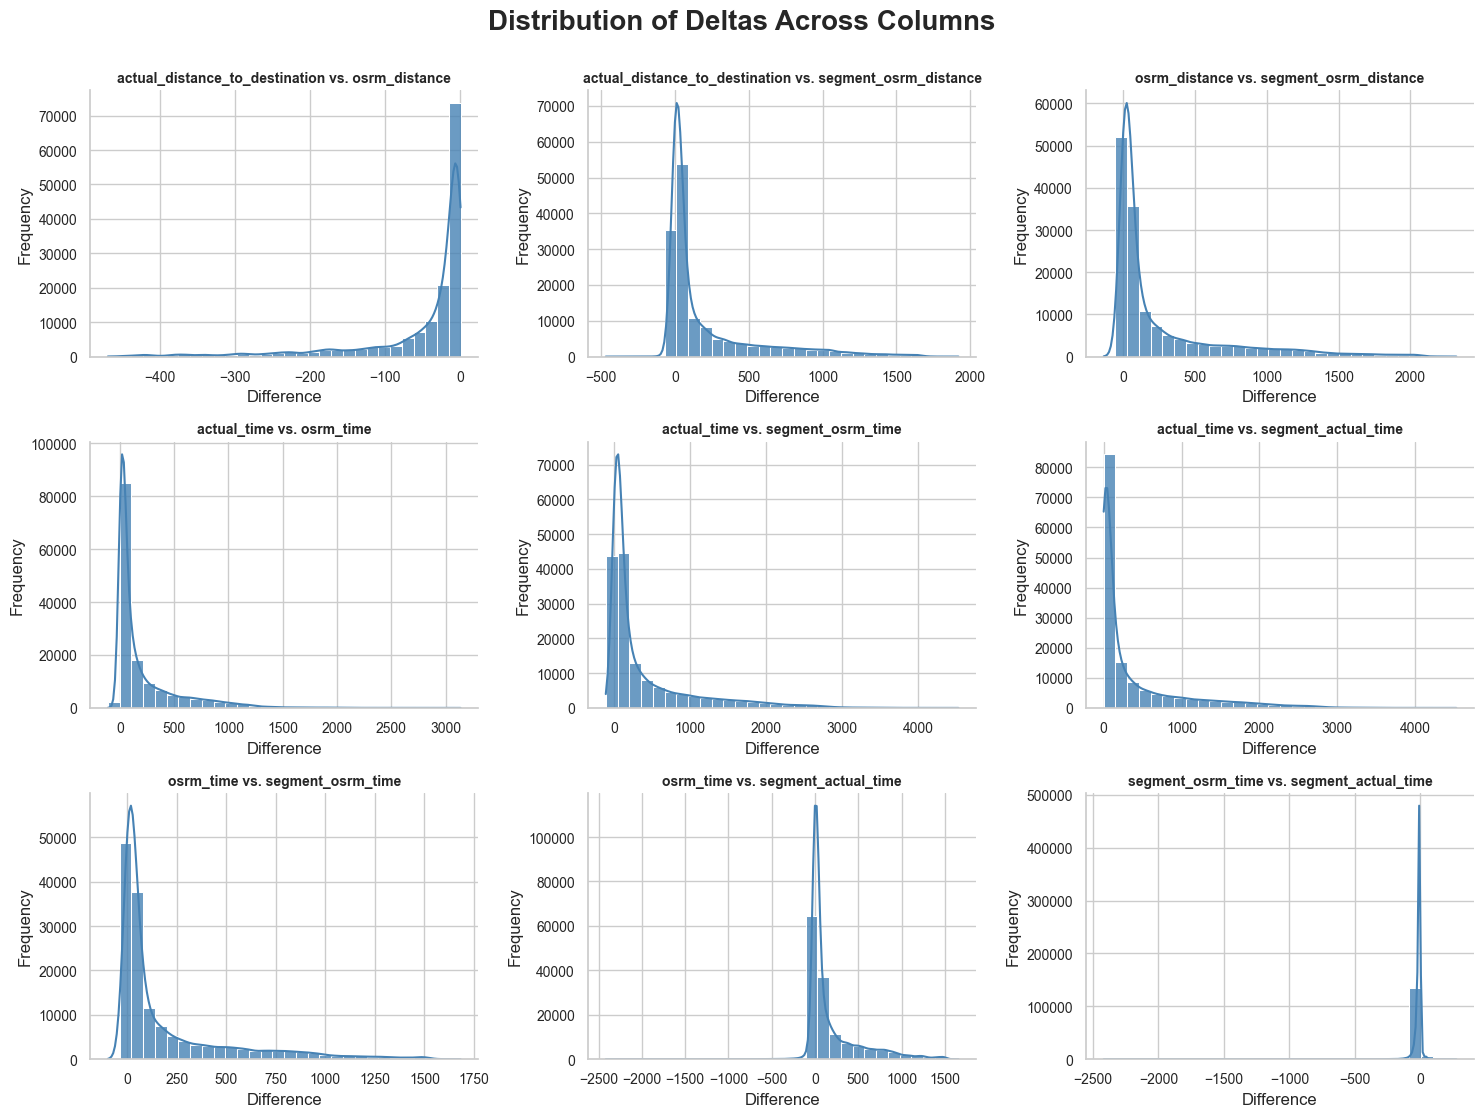

In [288]:

sns.set_theme(style="whitegrid", palette="muted")

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution of Deltas Across Columns', fontsize=20, fontweight='bold', y=0.93)


for col, ax in zip(delta_columns, axes.flat):
    sns.histplot(
        df_delta[col], 
        kde=True, 
        bins=30, 
        color='steelblue', 
        edgecolor='white', 
        alpha=0.8, 
        ax=ax
    )
    ax.set_title(f'{col.replace("_minus_", " vs. ")}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Difference', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
    sns.despine(ax=ax, top=True, right=True)


plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

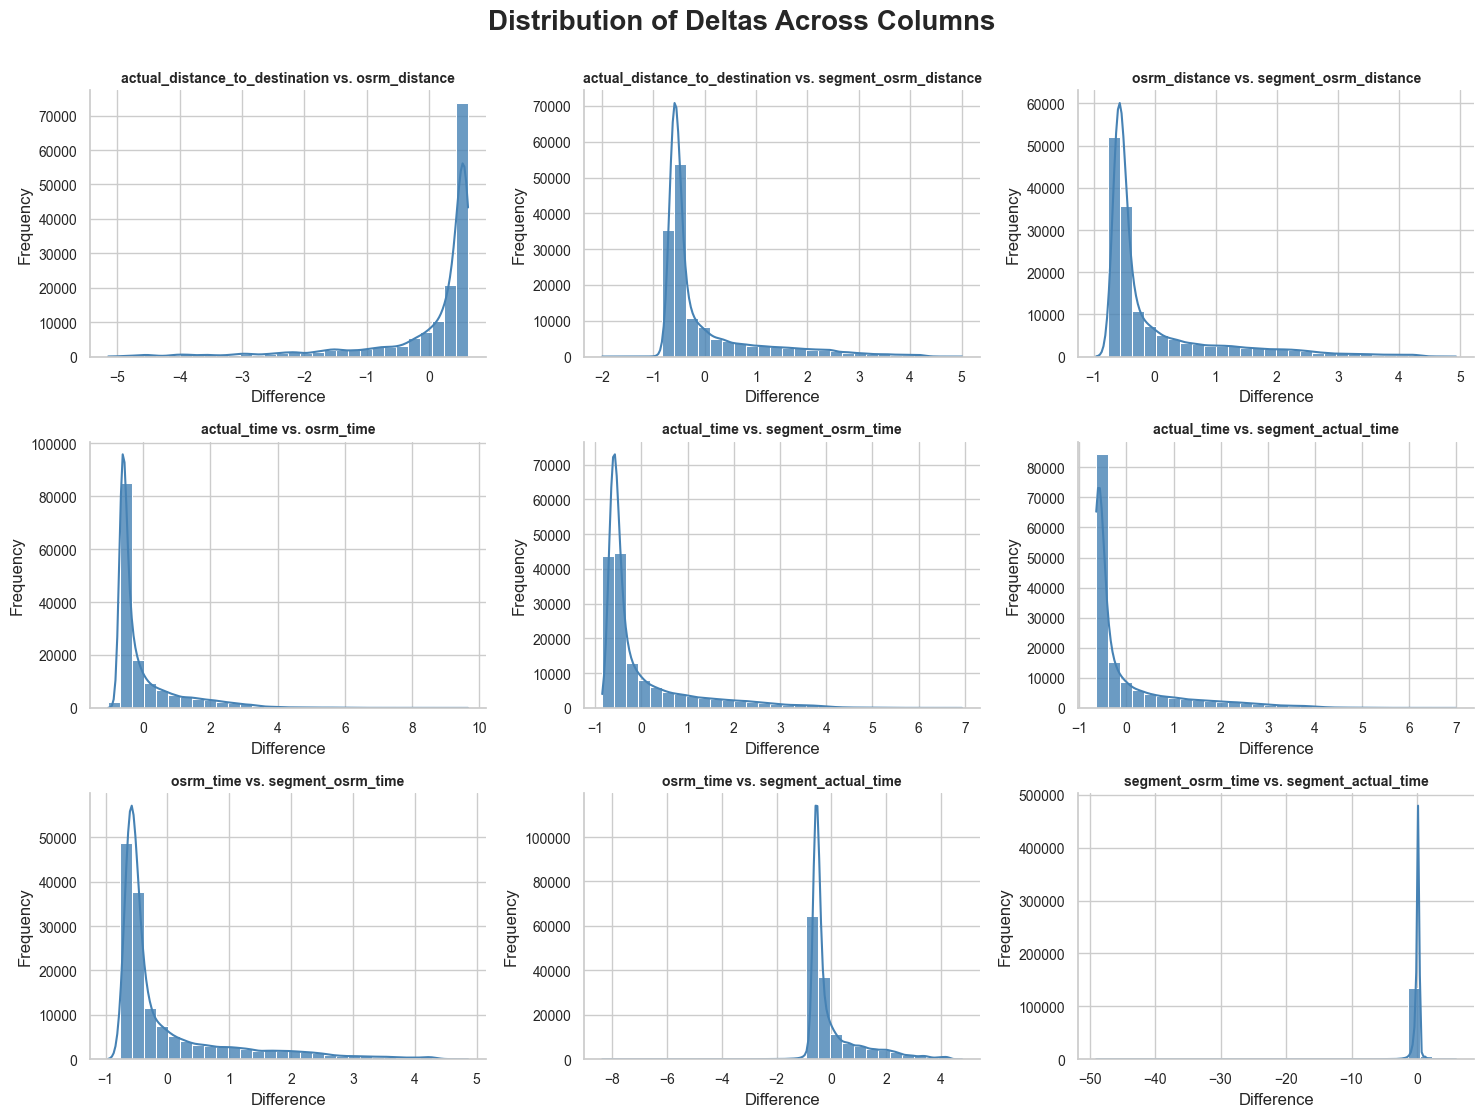

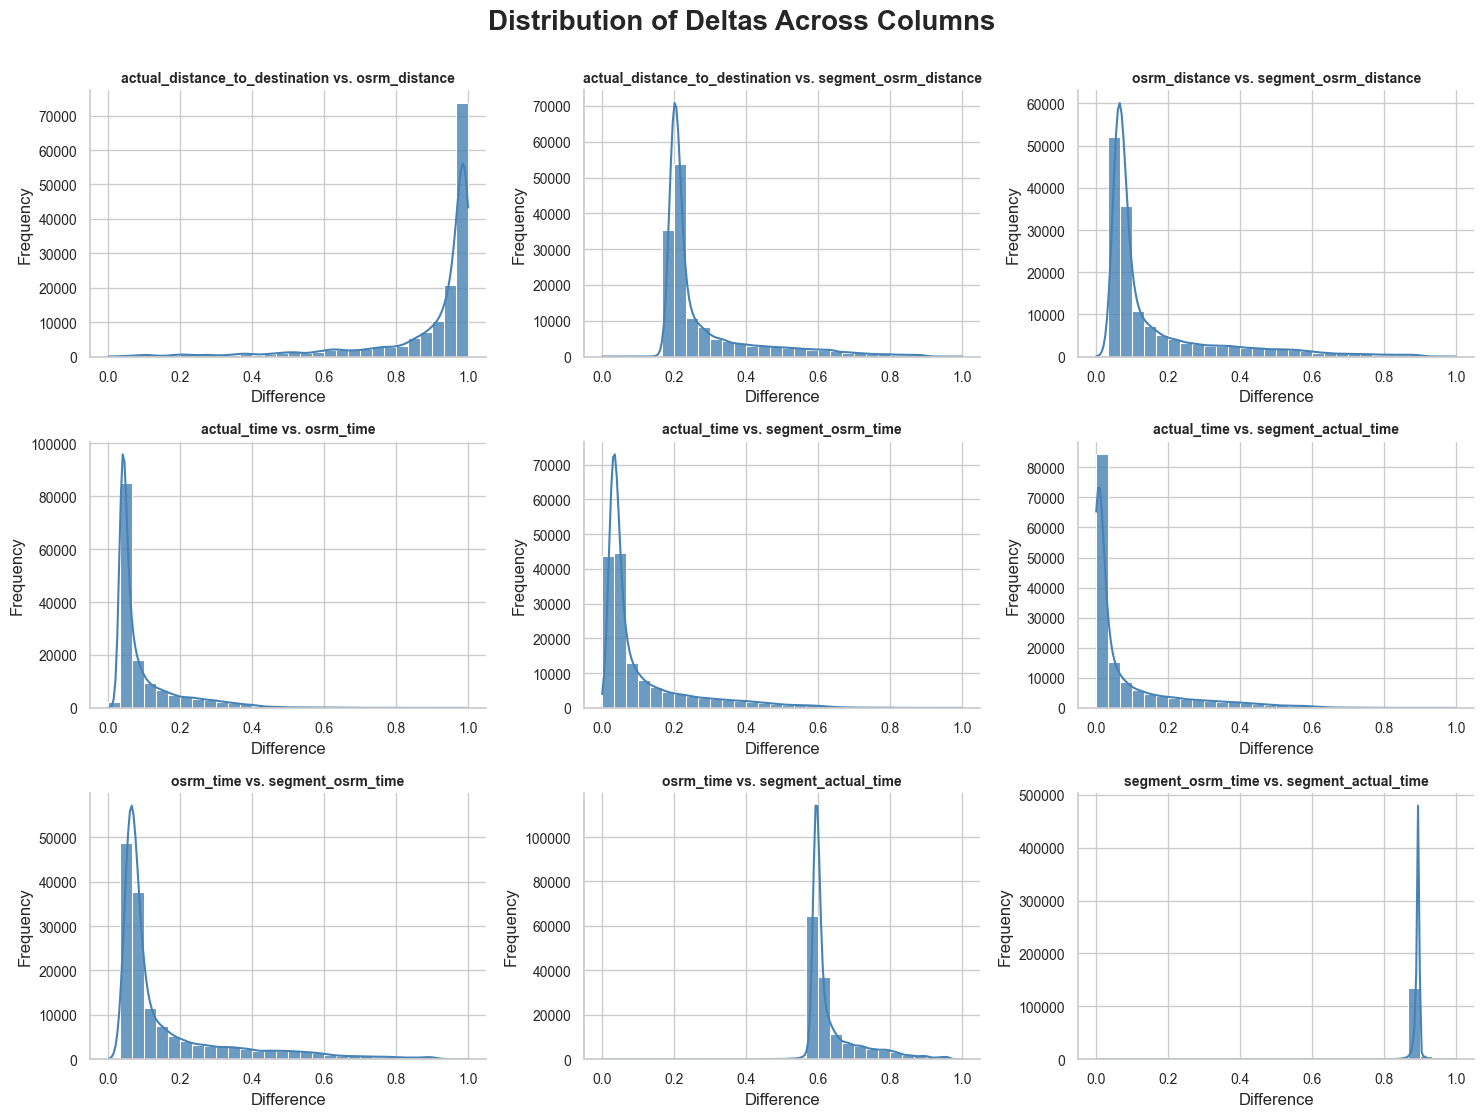

In [ ]:
# Obviously, the deltas are not normally distributed
# As a result, the normalized dataset can be evaluated.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# There are two ways to normalize: standardization and Scaling, both will be attempted
df_standardized = df_delta[delta_columns]
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df_standardized), columns=delta_columns)

scaler_minmax = MinMaxScaler()
df_scaled = df_delta[delta_columns]
df_scaled = pd.DataFrame(scaler_minmax.fit_transform(df_scaled), columns=delta_columns)
df_scaled.head()

# Then the visualtion of both approaches can be shown
# For clearer format, a function is provided.

def plot_nine_columns(raw_data):
    sns.set_theme(style="whitegrid", palette="muted")
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    fig.suptitle('Distribution of Deltas Across Columns', fontsize=20, fontweight='bold', y=0.93)
    for col, ax in zip(delta_columns, axes.flat):
        sns.histplot(
            raw_data[col], 
            kde=True, 
            bins=30, 
            color='steelblue', 
            edgecolor='white', 
            alpha=0.8, 
            ax=ax
        )
        ax.set_title(f'{col.replace("_minus_", " vs. ")}', fontsize=10, fontweight='bold')
        ax.set_xlabel('Difference', fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
        ax.tick_params(axis='both', labelsize=10)
        sns.despine(ax=ax, top=True, right=True)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# using the function rather than the bulk of codes
plot_nine_columns(df_standardized)
plot_nine_columns(df_scaled)

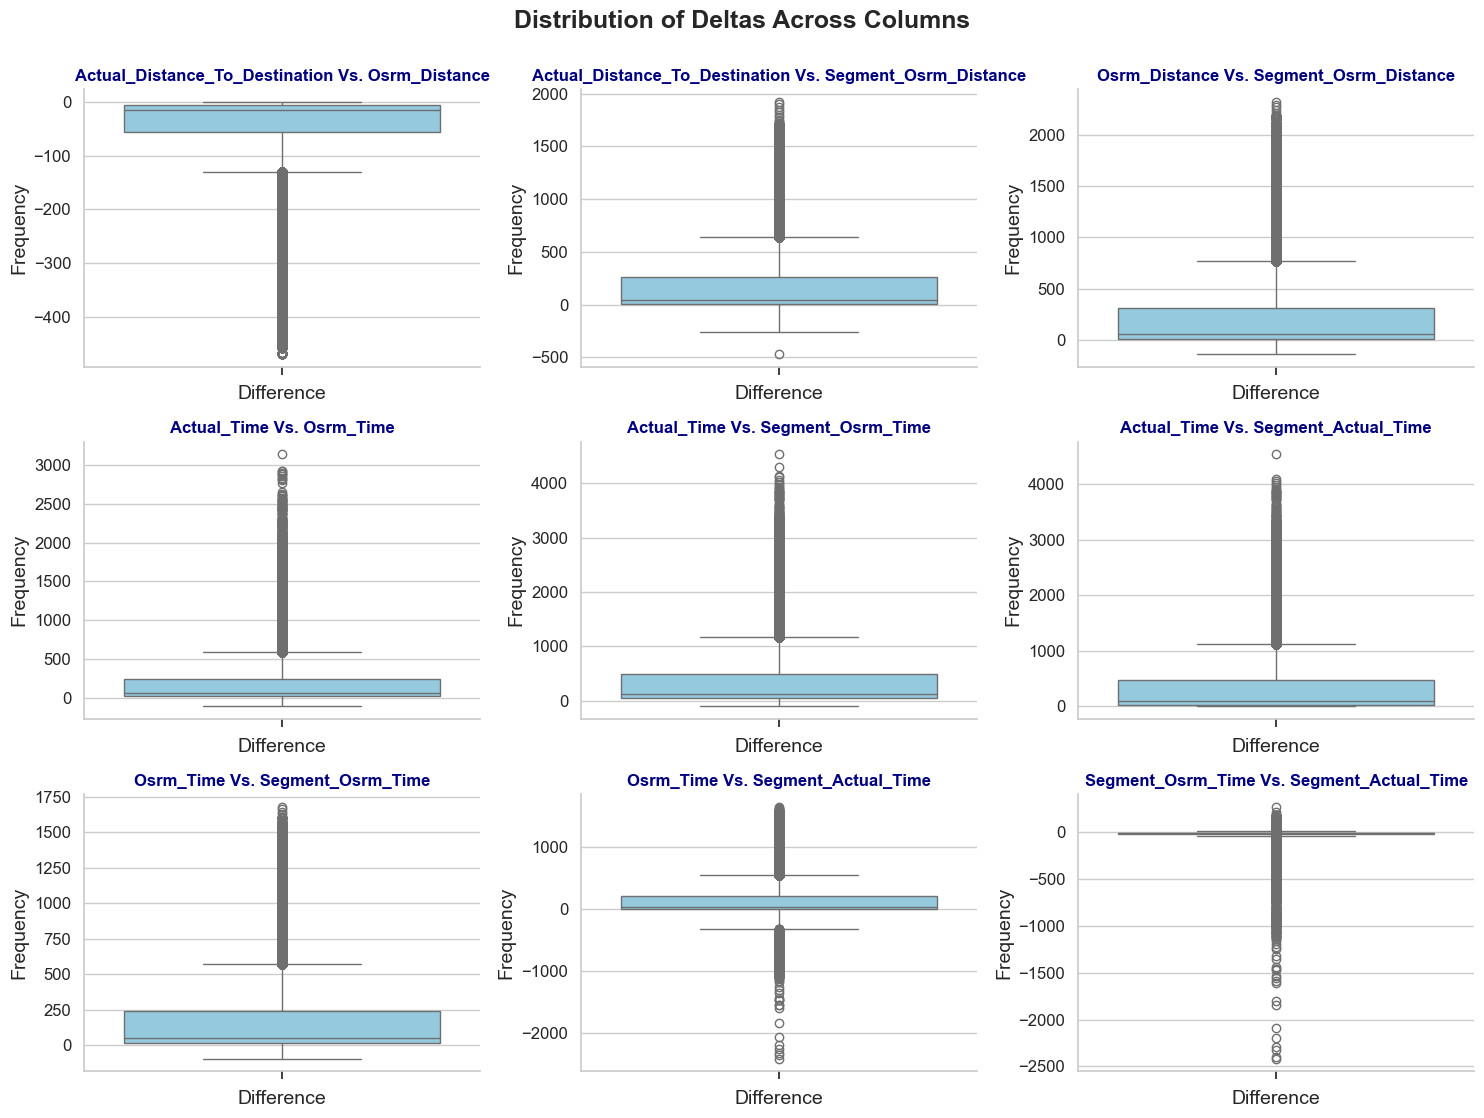

In [316]:
# both methods has limited effects from Pics
# So qqplot seems is tried
# Also, some ends of the distribution are 0, which presents good accuracy, they should not be processed along with the large devation
# As a result the percentile is introduced, while the boxplot is first created to visualize

df_percentile = df_delta[delta_columns]


def plot_nine_columns_boxplot(raw_data, delta_columns):
    sns.set_theme(style="whitegrid", palette="pastel")
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    
    fig.suptitle('Distribution of Deltas Across Columns', fontsize=18, fontweight='bold', y=0.93)
    
    for col, ax in zip(delta_columns, axes.flat):
        # Create horizontal boxplots
        sns.boxplot(
            y=raw_data[col],  # Set the column data for the y-axis
            color='skyblue',  # Change the box color to a softer blue

            ax=ax,  # Specify which subplot to plot on
            orient='y'  # Horizontal boxplots
        )
        
        ax.set_title(f'{col.replace("_minus_", " vs. ").title()}', fontsize=12, fontweight='bold', color='navy')
        ax.set_xlabel('Difference', fontsize=14)
        ax.set_ylabel('Frequency', fontsize=14)
        ax.tick_params(axis='both', labelsize=12)
        
        # Optional: Customizing axis ticks
        ax.xaxis.set_ticks_position('bottom')  # Put x-axis ticks at the bottom
        sns.despine(ax=ax, top=True, right=True)  # Remove top and right borders for clean look

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

plot_nine_columns_boxplot(df_percentile, delta_columns)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, BayesianRidge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

distance_time_pairs = list(itertools.product(distance_columns, time_columns))

def get_dataset_from_pair(dis_time_index):
	# pair the distance and time
	X, y = df_delta[distance_time_pairs[dis_time_index][0]].to_numpy().reshape(-1, 1), df_delta[distance_time_pairs[dis_time_index][1]].to_numpy()
	#print(X, y)
	return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    models['linear'] = LinearRegression()
    models['ridge'] = Ridge()
    models['lasso'] = Lasso()
    models['huber'] = HuberRegressor()  # Huber回归
    models['bayesian'] = BayesianRidge()  # 贝叶斯回归
    models['elasticnet'] = ElasticNet()  # 弹性网络回归
    models['poly'] = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())  # 多项式回归
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores

ModelComparsion = {}
for index_ in range(len(distance_time_pairs)):
	X, y = get_dataset_from_pair(index_)
	models = get_models()
	results, names = list(), list()
	for name, model in models.items():
		scores = evaluate_model(model, X, y)
		results.append(scores)
		names.append(name)
		#print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
	results_dict = dict(zip(names, results))
	print(results_dict)
	ModelComparsion[f'{distance_time_pairs[index_][0]}AND{distance_time_pairs[index_][1]}'] = results_dict
	"""
	# boxplot the result
	# 创建图形
	plt.figure(figsize=(10, 6))

	# 绘制箱型图
	plt.boxplot(results, 
				labels=names, 
				showmeans=True, 
				patch_artist=True,
				medianprops=dict(color='red', linewidth=2),
				boxprops=dict(facecolor='skyblue', color='blue', linewidth=2),
				whiskerprops=dict(color='green', linewidth=2),
				capprops=dict(color='orange', linewidth=2),
				flierprops=dict(marker='o', color='red', markersize=8)
				)

	plt.title('Model Performance Comparison', fontsize=16)
	plt.xlabel('Models', fontsize=14)
	plt.ylabel('Scores', fontsize=14)
	plt.grid(True, linestyle='--', alpha=0.6)
	plt.tight_layout()
	plt.show()
	"""

{'linear': array([0.9543424 , 0.9558759 , 0.9569332 , 0.95839976, 0.95746855,
       0.96121029, 0.95836232, 0.95800138, 0.95700931, 0.96002055,
       0.96190715, 0.95368223, 0.96026891, 0.95363494, 0.95888685,
       0.95708592, 0.9577    , 0.95797668, 0.95938862, 0.95679527,
       0.96100513, 0.95527947, 0.95611827, 0.95394205, 0.95748942,
       0.95868199, 0.96074539, 0.95809717, 0.9577778 , 0.95846439]), 'ridge': array([0.9543424 , 0.9558759 , 0.9569332 , 0.95839976, 0.95746855,
       0.96121029, 0.95836232, 0.95800138, 0.95700931, 0.96002055,
       0.96190715, 0.95368223, 0.96026891, 0.95363494, 0.95888685,
       0.95708592, 0.9577    , 0.95797668, 0.95938862, 0.95679527,
       0.96100513, 0.95527947, 0.95611827, 0.95394205, 0.95748942,
       0.95868199, 0.96074539, 0.95809717, 0.9577778 , 0.95846439]), 'lasso': array([0.95434239, 0.95587592, 0.95693312, 0.95839973, 0.9574686 ,
       0.96121032, 0.95836235, 0.95800139, 0.9570093 , 0.96002054,
       0.96190717, 0.9536822 

In [383]:
data = []

for index, (key, value) in enumerate(ModelComparsion.items()):
    for model_name, scores in value.items():
        avg_score = np.mean(scores)
        data.append({
            "Index": index,
            "Category": key,
            "Model": model_name,
            "Average Score": avg_score
        })

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data)

print(df)

     Index                                      Category       Model  \
0        0  actual_distance_to_destinationANDactual_time      linear   
1        0  actual_distance_to_destinationANDactual_time       ridge   
2        0  actual_distance_to_destinationANDactual_time       lasso   
3        0  actual_distance_to_destinationANDactual_time       huber   
4        0  actual_distance_to_destinationANDactual_time    bayesian   
..     ...                                           ...         ...   
103     11   segment_osrm_distanceANDsegment_actual_time    bayesian   
104     11   segment_osrm_distanceANDsegment_actual_time  elasticnet   
105     11   segment_osrm_distanceANDsegment_actual_time        poly   
106     11   segment_osrm_distanceANDsegment_actual_time         knn   
107     11   segment_osrm_distanceANDsegment_actual_time        cart   

     Average Score  
0         0.957752  
1         0.957752  
2         0.957752  
3         0.956625  
4         0.957752  
..       

In [384]:
data = []

for index, (key, value) in enumerate(ModelComparsion.items()):
    for model_name, scores in value.items():
        avg_score = np.mean(scores)
        data.append({
            "Index": index,
            "Category": key,
            "Model": model_name,
            "Average Score": avg_score
        })

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Pivot the DataFrame to have 'Index' as the row index and 'Average Score' as columns
pivoted_df = df.pivot(index='Index', columns='Model', values='Average Score')

print(pivoted_df)

Model  bayesian      cart  elasticnet     huber       knn     lasso    linear  \
Index                                                                           
0      0.957752  0.920459    0.957752  0.956625  0.951946  0.957752  0.957752   
1      0.991759  0.985303    0.991759  0.991711  0.991057  0.991759  0.991759   
2      0.026078 -0.836694    0.026078  0.009557 -0.044619  0.026079  0.026078   
3      0.001972 -1.006959    0.001972 -0.016312 -0.154630  0.001972  0.001972   
4      0.959207  0.927146    0.959207  0.957915  0.955401  0.959207  0.959207   
5      0.998238  0.997126    0.998238  0.998202  0.998238  0.998238  0.998238   
6      0.029612 -0.723227    0.029612  0.013076 -0.040887  0.029613  0.029612   
7      0.002300 -0.902159    0.002300 -0.015875 -0.176694  0.002300  0.002300   
8      0.057075 -0.595033    0.057084 -0.048752 -0.019220  0.057076  0.057074   
9      0.057024 -0.583390    0.057034 -0.054784 -0.010734  0.057027  0.057024   
10     0.893111  0.806789   

Index(['trip_creation_time', 'route_type', 'source_center',
       'destination_center', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance',
       'actual_distance_to_destination_minus_osrm_distance',
       'actual_distance_to_destination_minus_segment_osrm_distance',
       'osrm_distance_minus_segment_osrm_distance',
       'actual_time_minus_osrm_time', 'actual_time_minus_segment_osrm_time',
       'actual_time_minus_segment_actual_time',
       'osrm_time_minus_segment_osrm_time',
       'osrm_time_minus_segment_actual_time',
       'segment_osrm_time_minus_segment_actual_time',
       'actual_distance_to_destination_minus_osrm_distance_outlier',
       'actual_distance_to_destination_minus_segment_osrm_distance_outlier',
       'osrm_distance_minus_segment_osrm_distance_outlier',
       'actual_time_minus_osrm_time_outlier',
       'actual_time_minus_segment_osrm_time_ou

In [380]:
true_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143521 entries, 0 to 144866
Data columns (total 29 columns):
 #   Column                                                              Non-Null Count   Dtype         
---  ------                                                              --------------   -----         
 0   trip_creation_time                                                  143521 non-null  datetime64[ns]
 1   route_type                                                          143521 non-null  object        
 2   source_center                                                       143521 non-null  object        
 3   destination_center                                                  143521 non-null  object        
 4   actual_distance_to_destination                                      143521 non-null  float64       
 5   actual_time                                                         143521 non-null  float64       
 6   osrm_time                                        

In [381]:
df_delta.columns

Index(['trip_creation_time', 'route_type', 'source_center',
       'destination_center', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance',
       'actual_distance_to_destination_minus_osrm_distance',
       'actual_distance_to_destination_minus_segment_osrm_distance',
       'osrm_distance_minus_segment_osrm_distance',
       'actual_time_minus_osrm_time', 'actual_time_minus_segment_osrm_time',
       'actual_time_minus_segment_actual_time',
       'osrm_time_minus_segment_osrm_time',
       'osrm_time_minus_segment_actual_time',
       'segment_osrm_time_minus_segment_actual_time',
       'actual_distance_to_destination_minus_osrm_distance_outlier',
       'actual_distance_to_destination_minus_segment_osrm_distance_outlier',
       'osrm_distance_minus_segment_osrm_distance_outlier',
       'actual_time_minus_osrm_time_outlier',
       'actual_time_minus_segment_osrm_time_ou

In [385]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, BayesianRidge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

distance_time_pairs = list(itertools.product(distance_columns, time_columns))

def get_dataset_from_pair(dis_time_index):
	# pair the distance and time
	X, y = true_rows[distance_time_pairs[dis_time_index][0]].to_numpy().reshape(-1, 1), true_rows[distance_time_pairs[dis_time_index][1]].to_numpy()
	#print(X, y)
	return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    models['linear'] = LinearRegression()
    models['ridge'] = Ridge()
    models['lasso'] = Lasso()
    models['huber'] = HuberRegressor()  # Huber回归
    models['bayesian'] = BayesianRidge()  # 贝叶斯回归
    models['elasticnet'] = ElasticNet()  # 弹性网络回归
    models['poly'] = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())  # 多项式回归
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores

ModelComparsion = {}
for index_ in range(len(distance_time_pairs)):
	X, y = get_dataset_from_pair(index_)
	models = get_models()
	results, names = list(), list()
	for name, model in models.items():
		scores = evaluate_model(model, X, y)
		results.append(scores)
		names.append(name)
		#print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
	results_dict = dict(zip(names, results))
	print(results_dict)
	ModelComparsion[f'{distance_time_pairs[index_][0]}AND{distance_time_pairs[index_][1]}'] = results_dict

{'linear': array([0.95547055, 0.96174333, 0.95512177, 0.95216994, 0.95452933,
       0.96018279, 0.95737862, 0.95780253, 0.95371701, 0.95729623,
       0.95471766, 0.95629217, 0.95531381, 0.95940203, 0.95933319,
       0.9561835 , 0.95539839, 0.95544625, 0.95868968, 0.95457496,
       0.95391218, 0.95565235, 0.95397497, 0.95878163, 0.95939196,
       0.95921326, 0.9558495 , 0.95606629, 0.95805194, 0.95447554]), 'ridge': array([0.95547055, 0.96174333, 0.95512177, 0.95216994, 0.95452933,
       0.96018279, 0.95737862, 0.95780253, 0.95371701, 0.95729623,
       0.95471766, 0.95629217, 0.95531381, 0.95940203, 0.95933319,
       0.9561835 , 0.95539839, 0.95544625, 0.95868968, 0.95457496,
       0.95391218, 0.95565235, 0.95397497, 0.95878163, 0.95939196,
       0.95921326, 0.9558495 , 0.95606629, 0.95805194, 0.95447554]), 'lasso': array([0.95547053, 0.96174333, 0.95512176, 0.95216996, 0.95452935,
       0.96018282, 0.95737868, 0.95780248, 0.95371701, 0.95729618,
       0.95471768, 0.95629216

In [386]:
data = []

for index, (key, value) in enumerate(ModelComparsion.items()):
    for model_name, scores in value.items():
        avg_score = np.mean(scores)
        data.append({
            "Index": index,
            "Category": key,
            "Model": model_name,
            "Average Score": avg_score
        })

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Pivot the DataFrame to have 'Index' as the row index and 'Average Score' as columns
pivoted_df = df.pivot(index='Index', columns='Model', values='Average Score')

print(pivoted_df)

Model  bayesian      cart  elasticnet     huber       knn     lasso    linear  \
Index                                                                           
0      0.956538  0.917693    0.956538  0.955430  0.950431  0.956538  0.956538   
1      0.991326  0.984598    0.991326  0.991278  0.990646  0.991326  0.991326   
2      0.021596 -0.822947    0.021596  0.005485 -0.046154  0.021597  0.021595   
3      0.000306 -1.001464    0.000306 -0.017656 -0.163463  0.000306  0.000306   
4      0.958104  0.924170    0.958104  0.956837  0.953987  0.958104  0.958104   
5      0.998144  0.996946    0.998144  0.998105  0.998143  0.998144  0.998144   
6      0.024996 -0.764446    0.024996  0.008995 -0.059633  0.024997  0.024996   
7      0.000457 -0.933491    0.000456 -0.017330 -0.189706  0.000456  0.000456   
8      0.051699 -0.603598    0.051711 -0.054282 -0.022326  0.051701  0.051699   
9      0.051633 -0.591880    0.051646 -0.060332 -0.013889  0.051637  0.051633   
10     0.889792  0.802197   

Linear regression for actual_distance_to_destination vs actual_time:
Slope: 1.70, Intercept: 19.78


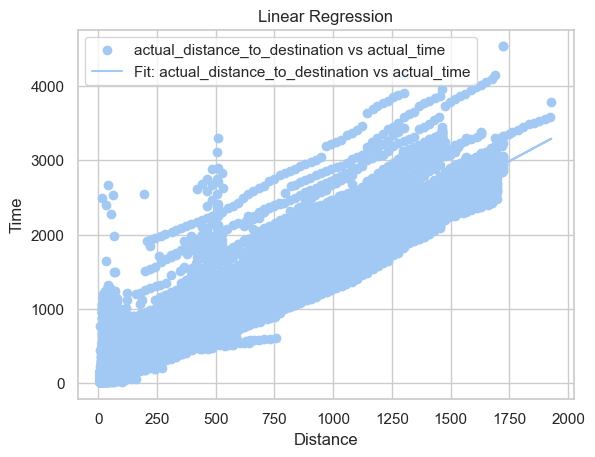

In [ ]:
distance_columns = ['actual_distance_to_destination', 'osrm_distance', 'segment_osrm_distance']
time_columns =['actual_time', 'osrm_time', 'segment_osrm_time', 'segment_actual_time']

# Initialize linear regression model
model = LinearRegression()
# Loop over each pair of distance and time columns
distance_time_pairs = list(itertools.product(distance_columns, time_columns))
for pair_ in distance_time_pairs:
        # Reshape the data for linear regression (X needs to be a 2D array)
        X = df_delta[pair_[0]].values.reshape(-1, 1)  # Distance as independent variable
        y = df_delta[pair_[1]].values  # Time as dependent variable
        #print(len(X))
        # Fit the model
        model.fit(X, y)
        
        # Get the coefficients
        slope = model.coef_[0]
        intercept = model.intercept_
        
        # Print the result for this pair
        print(f"Linear regression for {pair_[0]} vs {pair_[1]}:")
        print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}")
        
        # Optional: Plot the regression line
        plt.scatter(df_delta[pair_[0]], df_delta[pair_[1]], label=f'{pair_[0]} vs {pair_[1]}')
        plt.plot(df_delta[pair_[0]], model.predict(X), label=f'Fit: {pair_[0]} vs {pair_[1]}')
        plt.xlabel('Distance')
        plt.ylabel('Time')
        plt.legend()
        plt.title('Linear Regression')
        break
# Show the plot (optional)
plt.show()